In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

In [2]:
sketch_path = 'C:/Users/Samik Bhatia/forensic sketch reco/Sketch'
photos_path = 'C:/Users/Samik Bhatia/forensic sketch reco/Photos'
output_path = 'C:/Users/Samik Bhatia/forensic sketch reco/Generated'

In [3]:
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [4]:
def divide(grey_img, b, invertedblur=256.0):
    return (grey_img * scale) / invertedblur

In [5]:
def convert_to_sketch(img):
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    invert = cv2.bitwise_not(grey_img)
    blur = cv2.GaussianBlur(invert, (21, 21), 0)
    invertedblur = cv2.bitwise_not(blur)
    sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
    return sketch

In [6]:
for filename in os.listdir(photos_path):
    img = load_img(os.path.join(photos_path, filename), target_size=(224, 224))
    img_array = img_to_array(img)
    sketch = convert_to_sketch(img_array)

    sketch_filename = os.path.splitext(filename)[0] + '_sketch.png'
    cv2.imwrite(os.path.join(output_path, sketch_filename), sketch)

In [20]:
img.size

(224, 224)

In [26]:
img.show()

In [7]:
database_sketches = []
for filename in os.listdir(output_path):
    if filename.endswith('_sketch.png'):
        sketch = cv2.imread(os.path.join(output_path, filename), cv2.IMREAD_GRAYSCALE)
        sketch = cv2.resize(sketch, (224, 224)) / 255.0  # Normalize pixel values
        database_sketches.append(sketch)

database_sketches = np.array(database_sketches)

In [8]:
database_photos = []
for filename in os.listdir(photos_path):
    photo = cv2.imread(os.path.join(photos_path, filename))
    photo = cv2.resize(photo, (224, 224)) / 255.0
    database_photos.append(photo)
    
database_photos = np.array(database_photos)

In [9]:
input_path = 'C:/Users/Samik Bhatia/forensic sketch reco/Imported/Sketch.jpg'
user_input = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
user_input = cv2.resize(user_input, (224, 224)) / 255.0

In [10]:
from scipy.spatial.distance import cosine

In [11]:
similarities = [1 - cosine(user_input.flatten(), sketch.flatten()) for sketch in database_sketches]

In [12]:
threshold = 0.7

In [13]:
best_match_index = np.argmax(similarities)

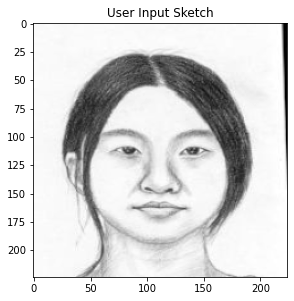

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('User Input Sketch')
plt.imshow(user_input, cmap='gray')

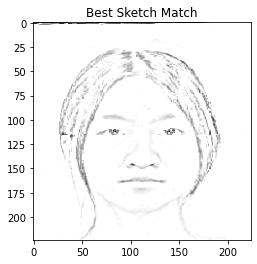

In [15]:
plt.title('Best Sketch Match')
plt.imshow(database_sketches[best_match_index], cmap='gray')

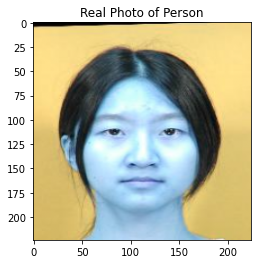

In [16]:
plt.title('Real Photo of Person')
plt.imshow(database_photos[best_match_index])

In [17]:
if similarities[best_match_index] > threshold:
    print(f"The user's sketch matches with {os.listdir(output_path)[best_match_index]}")
else:
    print("No match found.")
plt.show()

The user's sketch matches with Photos (32)_sketch.png


Text(0, 0.5, 'Similarity')

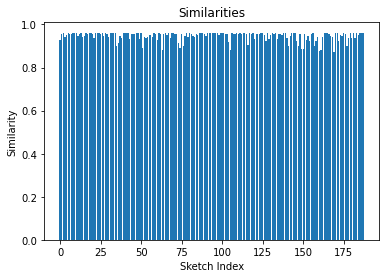

In [18]:
plt.title('Similarities')
plt.bar(range(len(similarities)), similarities)
plt.xlabel('Sketch Index')
plt.ylabel('Similarity')

Text(0.5, 0, 'Left: User Input  |  Right: Best Match')

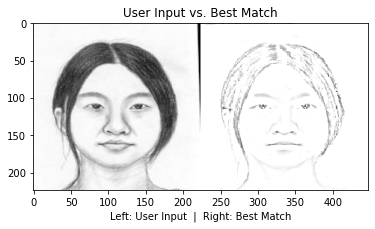

In [19]:
plt.title('User Input vs. Best Match')
plt.imshow(np.hstack([user_input, database_sketches[best_match_index]]), cmap='gray')
plt.xlabel('Left: User Input  |  Right: Best Match')